In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


# **Importing Modules**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

# **Linear Model Classification**

# **Data Preprocessing**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ml /rain.zip")

# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nColumn names:", data.columns)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Drop columns with too many missing values or irrelevant features
# You can adjust the threshold as per your requirement
threshold = 0.5 * len(data) # Drop columns with more than 50% missing values
data.dropna(thresh=threshold, axis=1, inplace=True)

# Drop rows with any missing values in the remaining columns
data.dropna(inplace=True)

# Display the new shape of the dataset after dropping missing values
print("\nShape of the dataset after dropping missing values:", data.shape)

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the dataset after one-hot encoding
print("\nFirst few rows of the dataset after one-hot encoding:")
print(data.head())

# Save the preprocessed dataset to a new CSV file
data.to_csv("weatherAUS_preprocessed.csv", index=False)

print("\nPreprocessing completed and saved to 'weatherAUS_preprocessed.csv'.")


Dataset shape: (145460, 23)

Column names: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

First few rows of the dataset:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W          

# **Logistic Regression**

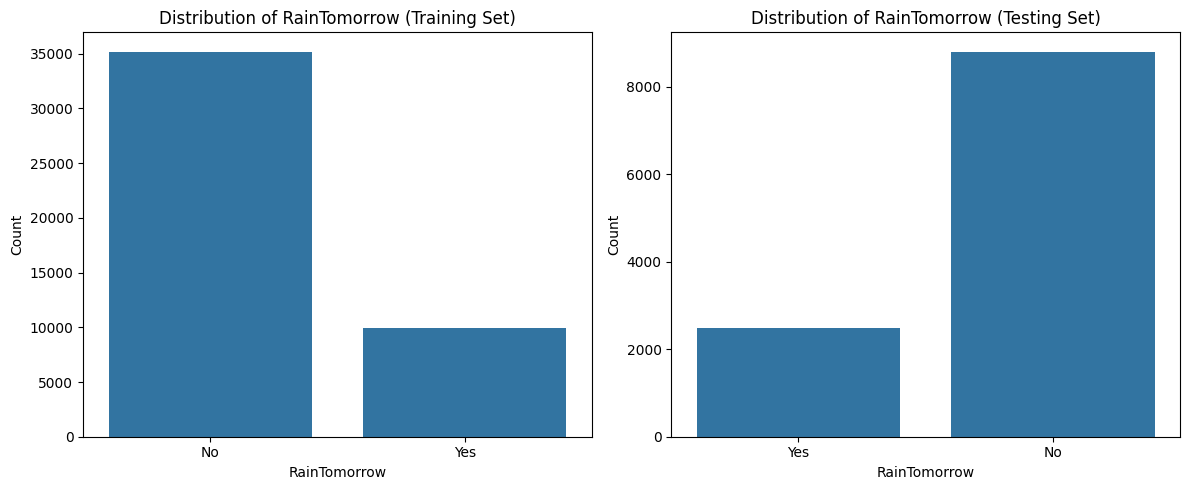

Accuracy: 0.8486352357320099
              precision    recall  f1-score   support

          No       0.88      0.93      0.91      8799
         Yes       0.69      0.57      0.62      2485

    accuracy                           0.85     11284
   macro avg       0.79      0.75      0.76     11284
weighted avg       0.84      0.85      0.84     11284



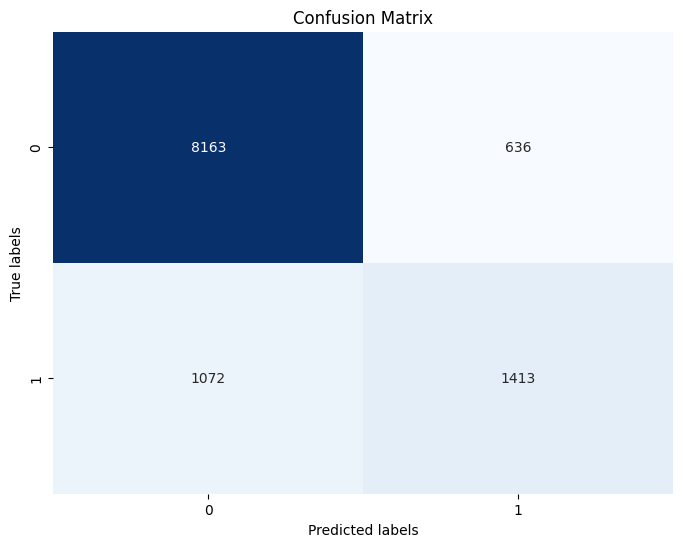

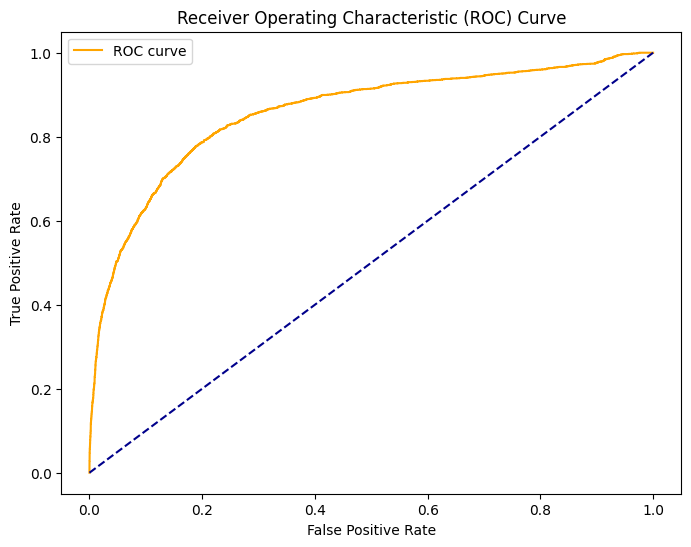

AUC Score: 0.8572303922409328


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ml /rain.zip')

# Data preprocessing
# Drop rows with missing values
data.dropna(inplace=True)

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Date'], drop_first=True)

# Separate features (X) and target variable (y)
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize distribution of 'RainTomorrow' in training and testing sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribution of RainTomorrow (Training Set)')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Distribution of RainTomorrow (Testing Set)')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Convert target variable 'RainTomorrow' to binary format
y_train_binary = y_train.map({'No': 0, 'Yes': 1})
y_test_binary = y_test.map({'No': 0, 'Yes': 1})

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and fit the logistic regression model with increased max_iter and scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# AUC score
auc_score = roc_auc_score(y_test_binary, y_pred_prob)
print(f'AUC Score: {auc_score}')


# **Naive Bayes**

Accuracy: 0.7975895072669266
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      8799
           1       0.53      0.68      0.60      2485

    accuracy                           0.80     11284
   macro avg       0.72      0.75      0.73     11284
weighted avg       0.82      0.80      0.81     11284



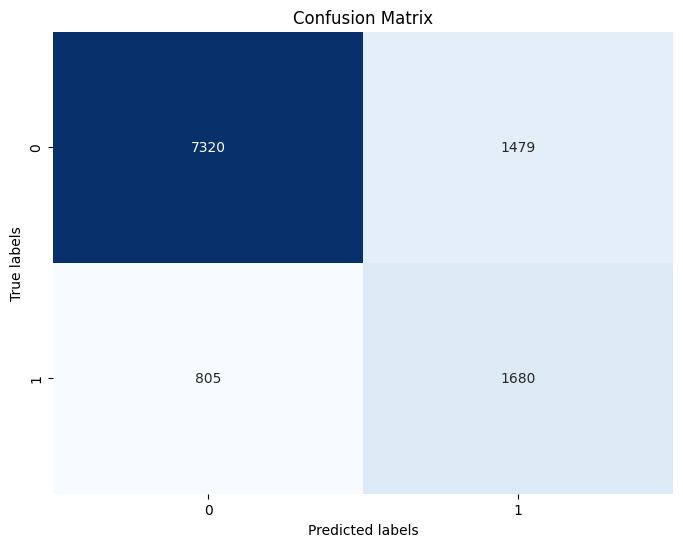

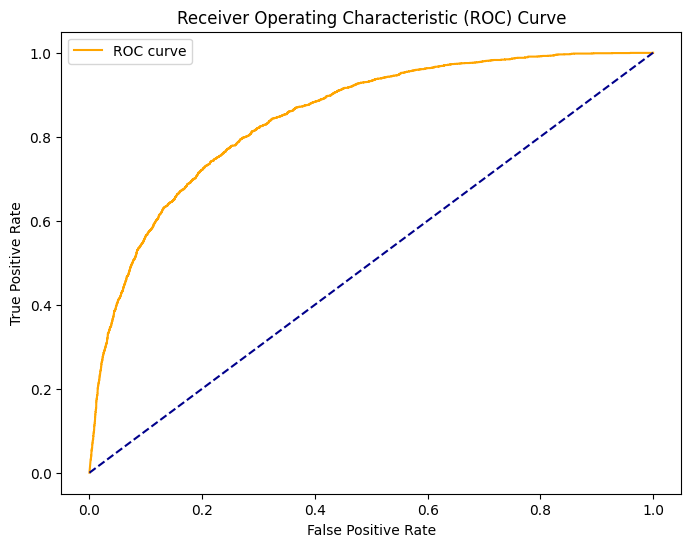

AUC Score: 0.8463397043243666


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ml /rain.zip')

# Data preprocessing
# Drop rows with missing values and non-numeric columns
data.dropna(inplace=True)
data.drop(columns=['Date'], inplace=True)

# Convert categorical variables into numerical labels
le = LabelEncoder()
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])
data['Location'] = le.fit_transform(data['Location'])
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data['RainToday'] = le.fit_transform(data['RainToday'])

# Separate features (X) and target variable (y)
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'AUC Score: {auc_score}')


# **Non Linear Model Classification**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ml /rain.zip")

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumns of the dataset:\n", df.columns)
print("\nData types of each column:\n", df.dtypes)

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Drop columns with too many missing values or irrelevant for analysis
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Drop rows with missing values in critical columns (target variable and predictors)
df.dropna(subset=['RainTomorrow', 'RainToday', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'], inplace=True)

# Convert categorical variables into numerical representations using one-hot encoding
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

# Convert 'RainToday' and 'RainTomorrow' to binary (0 or 1)
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Normalize numerical features
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min()) / (df[numerical_cols].max() - df[numerical_cols].min())

# Display the first few rows of the processed dataset
print("\nProcessed dataset:")
print(df.head())

# Save the preprocessed dataset
df.to_csv("weatherAUS_preprocessed.csv", index=False)


Shape of the dataset: (145460, 23)

Columns of the dataset:
 Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Data types of each column:
 Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         o

<ipython-input-15-d05c3ea65152>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])
<ipython-input-15-d05c3ea65152>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])


Accuracy score on test set: 0.793069833392414


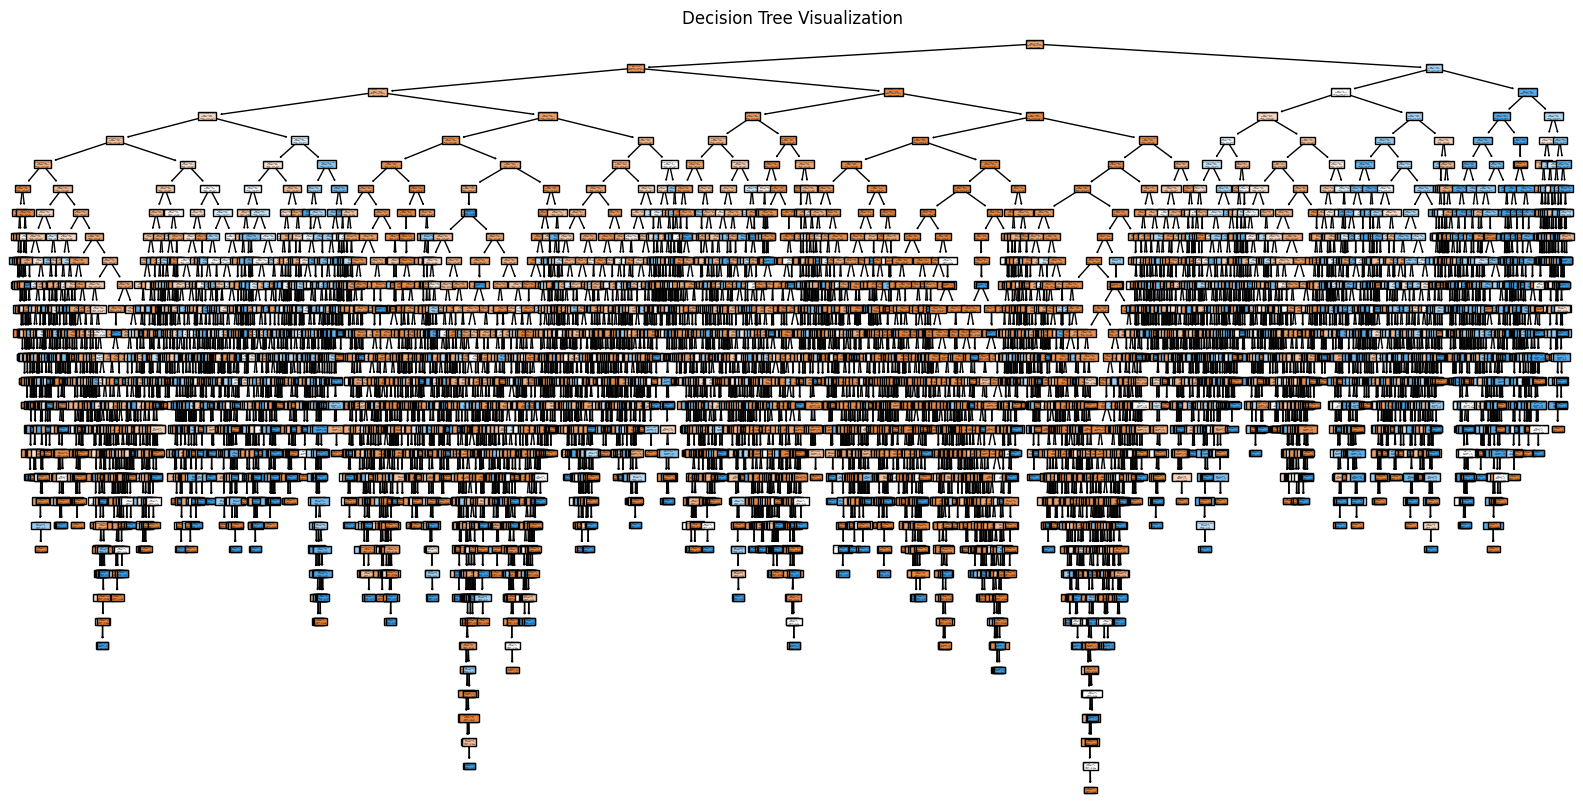

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ml /rain.zip")

# Drop rows with missing values
data = data.dropna()

# Convert categorical variables to numerical values using Label Encoding
label_encoders = {}
for column in ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into features and target variable
X = data.drop(['RainTomorrow', 'Date', 'Location'], axis=1)
y = data['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score on test set:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Rain", "Rain"])
plt.title("Decision Tree Visualization")
plt.show()


**Non Linear model : Neural Network**

<ipython-input-16-f15cd4ecec97>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])
<ipython-input-16-f15cd4ecec97>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])
<ipython-input-16-f15cd4ecec97>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Epoch 1/20
565/565 [==============================] - 4s 3ms/step - loss: 0.3639 - accuracy: 0.8370 - val_loss: 0.3384 - val_accuracy: 0.8510
Epoch 2/20
565/565 [==============================] - 2s 3ms/step - loss: 0.3398 - accuracy: 0.8500 - val_loss: 0.3311 - val_accuracy: 0.8545
Epoch 3/20
565/565 [==============================] - 2s 3ms/step - loss: 0.3339 - accuracy: 0.8544 - val_loss: 0.3325 - val_accuracy: 0.8535
Epoch 4/20
565/565 [==============================] - 2s 3ms/step - loss: 0.3301 - accuracy: 0.8546 - val_loss: 0.3257 - val_accuracy: 0.8554
Epoch 5/20
565/565 [==============================] - 2s 3ms/step - loss: 0.3269 - accuracy: 0.8572 - val_loss: 0.3276 - val_accuracy: 0.8522
Epoch 6/20
565/565 [==============================] - 2s 3ms/step - loss: 0.3262 - accuracy: 0.8568 - val_loss: 0.3242 - val_accuracy: 0.8552
Epoch 7/20
565/565 [==============================] - 2s 4ms/step - loss: 0.3243 - accuracy: 0.8574 - val_loss: 0.3249 - val_accuracy: 0.8559
Epoch 

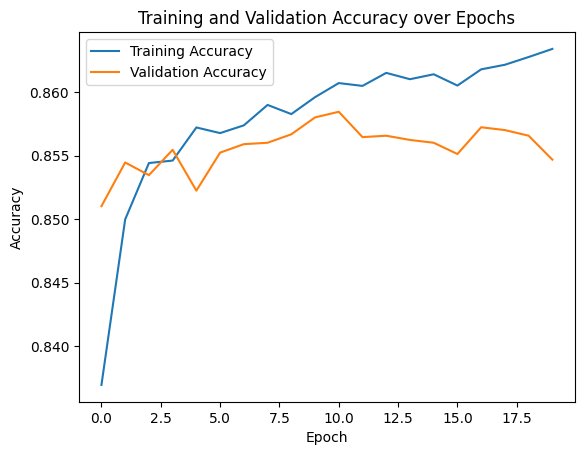

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ml /rain.zip")

# Drop rows with missing values
data = data.dropna()

# Convert categorical variables to numerical values using Label Encoding
label_encoders = {}
for column in ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into features and target variable
X = data.drop(['RainTomorrow', 'Date', 'Location'], axis=1)
y = data['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy on test set:", accuracy)

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
print("Accuracy score on test set:", accuracy_score(y_test, y_pred))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()
